In [3]:
from fitter import Fitter, get_common_distributions, get_distributions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
import seaborn as sns

# Importar dados

In [4]:
dados=pd.read_excel('dados_top20.xlsx', index_col = 0)
bov = dados['^BVSP']
dados.drop(columns = '^BVSP', inplace = True)
acoes = dados.columns
dados.describe()

,ALPA4.SA,EMBR3.SA,JBSS3.SA,USIM5.SA,VALE3.SA,FESA4.SA,ARZZ3.SA,PTBL3.SA,SLCE3.SA,FRAS3.SA,UNIP3.SA,BRAP3.SA,CRPG5.SA,SHUL4.SA,TAEE3.SA,RANI3.SA,WHRL4.SA,BIDI11.SA,EMAE4.SA,PCAR3.SA
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,42.803115,12.594962,25.204824,15.791257,87.526328,29.863866,73.840082,9.626589,37.154177,10.390577,60.206120,51.930225,52.733409,7.866740,10.855149,6.140824,7.675068,46.857551,59.540332,21.037466
std,7.063023,5.083356,4.244346,4.105785,21.570822,12.510644,13.718422,4.094936,10.364863,3.498810,24.924970,10.137873,29.727289,1.939515,1.820491,1.590938,0.700635,21.589679,23.118391,12.818160
min,33.369999,6.030000,17.911133,8.429005,52.718525,15.998379,51.936798,4.039599,23.230333,4.937777,28.643110,33.770439,18.643414,5.354951,8.241150,3.649492,6.415202,16.681622,25.107025,7.752992
25%,37.589999,7.965000,21.554750,11.547637,59.644591,17.940204,63.871040,6.378440,25.748277,7.004866,34.608858,39.960640,24.257949,6.233883,9.411416,4.919640,7.007193,21.677282,35.418522,8.847421
50%,40.510000,12.250000,24.818775,16.400776,91.757664,25.342195,72.064491,8.730243,39.954653,11.425404,53.111662,54.004452,46.614338,6.814542,10.373471,5.605490,7.682520,50.874289,58.918755,11.207109
75%,47.087499,17.285000,29.153741,19.302457,108.124434,40.532498,86.136515,13.440000,47.075617,12.129068,83.575817,60.185893,69.648970,10.070000,12.680000,7.680020,8.135000,66.470879,82.417500,35.145000
max,61.220001,23.680000,33.151058,23.563881,117.300003,56.099998,100.809998,19.290001,56.490002,17.299999,103.695068,67.650002,120.660004,11.280309,13.570000,9.644753,9.350000,85.242653,97.779999,41.750000


# Calcular retornos e covariância

In [5]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
ret_bov = bov.pct_change()
ret_bov_med = ret_bov.mean()
retorno_med = retorno_diario.mean()
desv_pad = retorno_diario.std()

In [6]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()

# Gerar carteiras aleatórias

In [7]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []
utilidade_mark = []
InfRatio = []

In [8]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 1000

np.random.seed(101)

A = 3

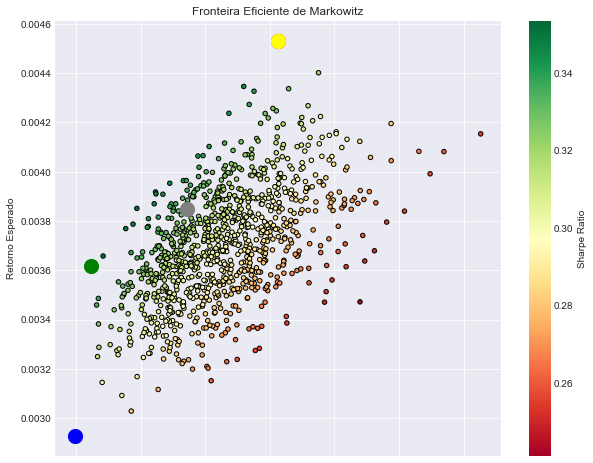

In [9]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    #Calcular a série temporal dessa carteira
    serie = []
    for i in range(len(dados)):
        serie.append(np.dot(peso, retorno_diario.iloc[i]))
    serie = pd.Series(serie, index = retorno_diario.index)
    
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_med)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_diaria, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    #Utilidade de Markowitz
    utilidade = retorno - 0.5*A*volatilidade**2
    #TEV
    TEV = serie.sub(ret_bov, axis = 0).std()
    #Information Ratio
    ir = (retorno - ret_bov_med)/TEV
        # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso.copy())
    utilidade_mark.append(utilidade)
    InfRatio.append(ir)

carteira = {'Retorno': retorno_carteira,
            'Desvio Padrão': volatilidade_carteira,
            'Sharpe Ratio': sharpe_ratio,
            'Utilidade do Investidor': utilidade_mark,
            'Information Ratio': InfRatio}

for contar,acao in enumerate(acoes):
    carteira[acao] = [Peso[contar] for Peso in peso_acoes]
    
# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Desvio Padrão', 'Sharpe Ratio', 'Utilidade do Investidor', 'Information Ratio'] + [acao for acao in acoes]
df = df[colunas]

#Identificando carteiras de interesse

carteira_retorno = df.iloc[df['Retorno'].idxmax()]
carteira_sharpe = df.iloc[df['Sharpe Ratio'].idxmax()]
carteira_utilidade = df.iloc[df['Utilidade do Investidor'].idxmax()]
carteira_IR = df.iloc[df['Information Ratio'].idxmax()]
carteira_risco = df.iloc[df['Desvio Padrão'].idxmin()]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Desvio Padrão', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_retorno['Desvio Padrão'], y=carteira_retorno['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_sharpe['Desvio Padrão'], y=carteira_sharpe['Retorno'], c='green', marker='o', s=200)
plt.scatter(x=carteira_utilidade['Desvio Padrão'], y=carteira_utilidade['Retorno'], c='yellow', marker='o', s=200)
plt.scatter(x=carteira_IR['Desvio Padrão'], y=carteira_IR['Retorno'], c='grey', marker='o', s=200)
plt.scatter(x=carteira_risco['Desvio Padrão'], y=carteira_risco['Retorno'], c='blue', marker='o', s=200)

plt.xlabel('Desvio Padrão')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

# Seleção de carteira

In [10]:
pesos_carteira=[]
for a in acoes:
    pesos_carteira.append(float(carteira_IR[a].mean()))
pesos_carteira = pd.Series(pesos_carteira)
pesos_carteira.index = acoes
pesos_carteira = pesos_carteira.sort_values(ascending = False)
pesos_carteira

ARZZ3.SA     0.088122
USIM5.SA     0.082438
BRAP3.SA     0.080667
FRAS3.SA     0.079872
EMBR3.SA     0.079095
PTBL3.SA     0.071832
CRPG5.SA     0.070831
UNIP3.SA     0.070206
EMAE4.SA     0.060938
VALE3.SA     0.059472
WHRL4.SA     0.050512
ALPA4.SA     0.045586
FESA4.SA     0.041746
TAEE3.SA     0.037110
BIDI11.SA    0.035487
JBSS3.SA     0.013137
RANI3.SA     0.010447
SLCE3.SA     0.009268
PCAR3.SA     0.007603
SHUL4.SA     0.005631
dtype: float64

In [11]:
print('Quantas ações você quer em sua carteira?')
n=int(input())
print('Essas são as ações sugeridas para sua carteira')
pesos_carteira.head(n).index

Quantas ações você quer em sua carteira?
7
Essas são as ações sugeridas para sua carteira


Index(['ARZZ3.SA', 'USIM5.SA', 'BRAP3.SA', 'FRAS3.SA', 'EMBR3.SA', 'PTBL3.SA',
       'CRPG5.SA'],
      dtype='object')

# Recalculando para carteira de tamanho reduzido

In [12]:
acoes_finais = ['ARZZ3.SA', 'USIM5.SA', 'BRAP3.SA', 'FRAS3.SA']

In [13]:
retorno_diario_final = dados[acoes_finais].pct_change()
retorno_med_final = retorno_diario_final.mean()
desv_pad_final = retorno_diario_final.std()
cov_diaria_final = retorno_diario_final.cov()

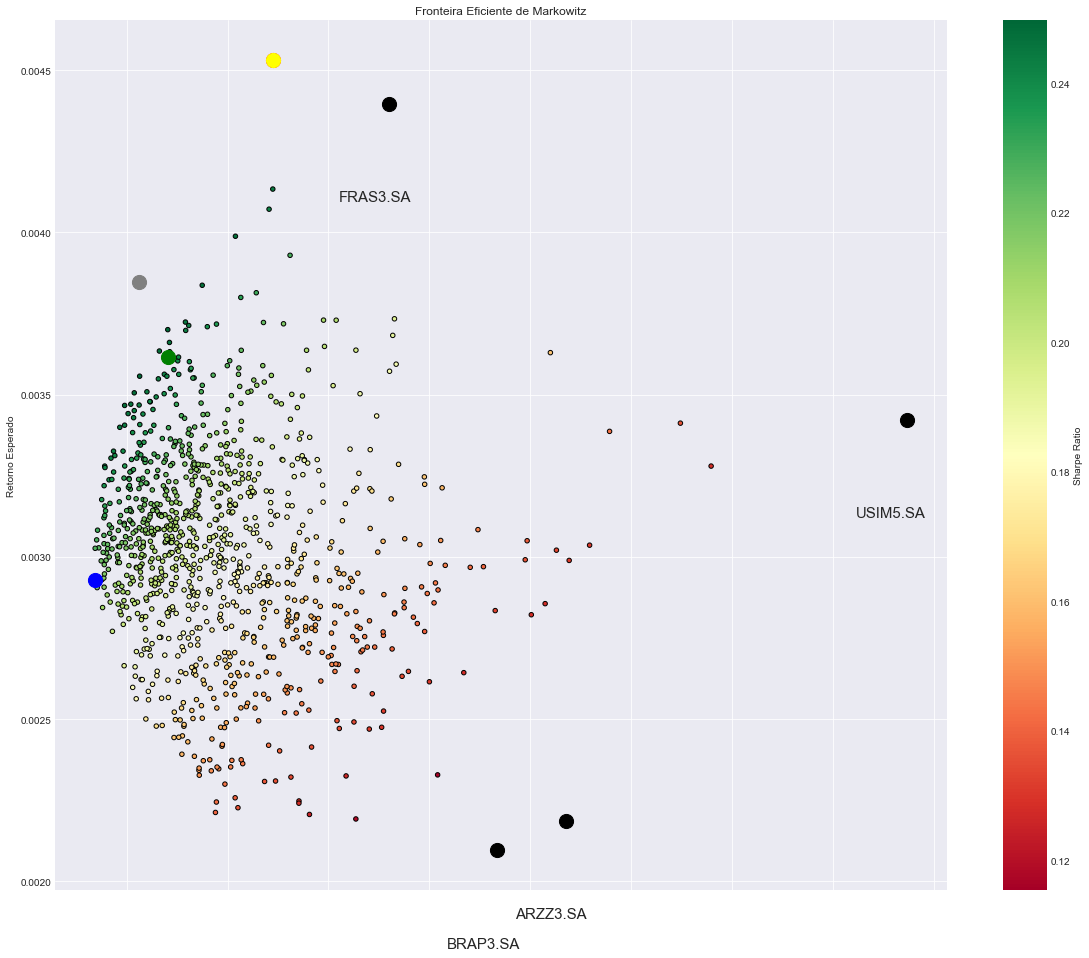

In [14]:
retorno_carteira_final = []
peso_acoes_final = []
volatilidade_carteira_final = []
sharpe_ratio_final = []
utilidade_mark_final = []
InfRatio_final = []

numero_acoes = len(acoes_finais)
numero_carteiras = 1000
np.random.seed(101)

for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    #Calcular a série temporal dessa carteira
    serie = []
    for i in range(len(dados)):
        serie.append(np.dot(peso, retorno_diario_final.iloc[i]))
    serie = pd.Series(serie, index = retorno_diario_final.index)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_med_final)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_diaria_final, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    #Utilidade do investidor
    utilidade = retorno - 0.5*A*volatilidade**2
    #TEV
    TEV = serie.sub(ret_bov, axis = 0).std()
    #Information Ratio
    ir = (retorno - ret_bov_med)/TEV
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio_final.append(sharpe)
    retorno_carteira_final.append(retorno)
    volatilidade_carteira_final.append(volatilidade)
    utilidade_mark_final.append(utilidade)
    InfRatio_final.append(ir)
    peso_acoes_final.append(peso)
carteira_final = {'Retorno': retorno_carteira_final,
                  'Desvio Padrão': volatilidade_carteira_final,
                  'Sharpe Ratio': sharpe_ratio_final,
                  'Utilidade do Investidor': utilidade_mark_final,
                  'Information Ratio': InfRatio_final}

for contar,acao in enumerate(acoes_finais):
    carteira_final[acao] = [Peso[contar] for Peso in peso_acoes_final]

# vamos transformar nosso dicionário em um dataframe
df_final = pd.DataFrame(carteira_final)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Desvio Padrão', 'Sharpe Ratio', 'Utilidade do Investidor', 'Information Ratio'] + [acao for acao in acoes_finais]
df_final = df_final[colunas]

#Identificando carteiras de interesse

carteira_retorno_final = df_final.iloc[df_final['Retorno'].idxmax()]
carteira_sharpe_final = df_final.iloc[df_final['Sharpe Ratio'].idxmax()]
carteira_utilidade_final = df_final.iloc[df_final['Utilidade do Investidor'].idxmax()]
carteira_IR_final = df_final.iloc[df_final['Information Ratio'].idxmax()]
carteira_risco_final = df_final.iloc[df_final['Desvio Padrão'].idxmin()]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df_final.plot.scatter(x='Desvio Padrão', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(20, 16), grid=True)
plt.scatter(x=carteira_retorno_final['Desvio Padrão'], y=carteira_retorno['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_sharpe_final['Desvio Padrão'], y=carteira_sharpe['Retorno'], c='green', marker='o', s=200)
plt.scatter(x=carteira_utilidade_final['Desvio Padrão'], y=carteira_utilidade['Retorno'], c='yellow', marker='o', s=200)
plt.scatter(x=carteira_IR_final['Desvio Padrão'], y=carteira_IR['Retorno'], c='grey', marker='o', s=200)
plt.scatter(x=carteira_risco_final['Desvio Padrão'], y=carteira_risco['Retorno'], c='blue', marker='o', s=200)
for acao in acoes_finais:
    plt.scatter(x=desv_pad[acao], y=retorno_med[acao], c='black', marker='o', s=200 )
    plt.text(x=desv_pad[acao]-0.001, y=retorno_med[acao]-0.0003, s=acao, fontsize = 15)
plt.xlabel('Desvio Padrão')

plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

In [15]:
print ("Essa é a carteira de Mínima Variância:", '\n', carteira_risco_final.T)
print ('\n')
print ("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe_final.T)
print ('\n')
print ("Essa é a carteira com maior Retorno:", '\n', carteira_retorno_final.T)
print ('\n')
print ("Essa é a carteira com maior Utilidade:", '\n', carteira_utilidade_final.T)
print ('\n')
print ("Essa é a carteira com maior IR:", '\n', carteira_IR_final.T)

Essa é a carteira de Mínima Variância: 
 Retorno                    0.003026
Desvio Padrão              0.013374
Sharpe Ratio               0.226283
Utilidade do Investidor    0.002758
Information Ratio          0.203381
ARZZ3.SA                   0.228552
USIM5.SA                   0.003950
BRAP3.SA                   0.374235
FRAS3.SA                   0.393263
Name: 714, dtype: float64


Essa é a carteira com maior Sharpe Ratio: 
 Retorno                    0.003700
Desvio Padrão              0.014814
Sharpe Ratio               0.249769
Utilidade do Investidor    0.003371
Information Ratio          0.217530
ARZZ3.SA                   0.054132
USIM5.SA                   0.065538
BRAP3.SA                   0.222989
FRAS3.SA                   0.657342
Name: 458, dtype: float64


Essa é a carteira com maior Retorno: 
 Retorno                    0.004133
Desvio Padrão              0.016897
Sharpe Ratio               0.244624
Utilidade do Investidor    0.003705
Information Ratio          0

# Corrigir pesos

In [16]:
pesos_carteira_final=[]
for a in acoes_finais:
    pesos_carteira_final.append(float(carteira_sharpe_final[a].mean()))
pesos_carteira_final = pd.Series(pesos_carteira_final)
pesos_carteira_final.index = acoes_finais
#pesos_carteira_final = pesos_carteira_final.sort_values(ascending = False)
pesos_carteira_final

ARZZ3.SA    0.054132
USIM5.SA    0.065538
BRAP3.SA    0.222989
FRAS3.SA    0.657342
dtype: float64

In [17]:
#PRECISO MELHORAR ESSA SEÇÃO!!!!!!!!!!!!!!!!!!!!!

n=0
teto = 0.50
#Primeiro loop para imprimir o teto aos pesos das ações
for a in acoes_finais:
    #print(a + '\n')
    if pesos_carteira_final[a]>=teto:
        #print(a + ' entrou no loop' + '\n')
        pesos_carteira_final[a]=teto
        n+=1
    soma_pesos = pesos_carteira_final.sum()
    peso_restante = (1-teto*n)
acoes_menores_20 = []
#Segundo loop para reconhecer quais ações tem peso menor que 20%
for a in acoes_finais:
    if pesos_carteira_final[a]<teto:
        acoes_menores_20.append(pesos_carteira_final[a])
fator = peso_restante/sum(acoes_menores_20)
#Redistribuir o peso às ações menores que 20%
for i in range(len(acoes_menores_20)):
    acoes_menores_20[i] = acoes_menores_20[i] *fator
acoes_menores_20
for a in acoes_finais:
    if pesos_carteira_final[a]<teto:
        pesos_carteira_final[a]=pesos_carteira_final[a]*fator
pesos_carteira_final

ARZZ3.SA    0.078989
USIM5.SA    0.095631
BRAP3.SA    0.325380
FRAS3.SA    0.500000
dtype: float64

# Série temporal da carteira final

In [18]:
retorno_diario_final.iloc[1]

ARZZ3.SA   -0.014537
USIM5.SA    0.018868
BRAP3.SA    0.011923
FRAS3.SA   -0.007380
Name: 2020-08-12 00:00:00, dtype: float64

In [19]:
ret_carteira = []
for i in range(len(retorno_diario_final)):
    ret_carteira.append(np.dot(retorno_diario_final.iloc[i].T,pesos_carteira_final))
ret_carteira = pd.Series(ret_carteira, index = retorno_diario_final.index)
ret_carteira

Date
2020-08-11         NaN
2020-08-12    0.000846
2020-08-13    0.003011
2020-08-14    0.008548
2020-08-17   -0.012907
                ...   
2021-08-25   -0.008647
2021-08-26   -0.010654
2021-08-27    0.008927
2021-08-30   -0.012469
2021-08-31   -0.001691
Length: 260, dtype: float64

In [20]:
TEV_carteira = ret_carteira.sub(ret_bov, axis = 0).std()
TEV_carteira

0.012458779596492529

In [21]:
InfRatio_carteira_final = (ret_carteira.mean() - ret_bov_med)/TEV_carteira
InfRatio_carteira_final

0.21549120944185757

In [22]:
# vamos calcular o retorno da carteira final
retorno_carteira_final = np.dot(pesos_carteira_final, retorno_med_final)
# vamos calcular a volatilidade da carteira final
volatilidade_carteira_final = np.sqrt(np.dot(pesos_carteira_final.T, np.dot(cov_diaria_final, pesos_carteira_final)))
# vamos calcular o índice de Sharpe da carteira final
sharpe_carteira_final = retorno_carteira_final / volatilidade_carteira_final
#Utilidade
utilidade_carteira_final = retorno_carteira_final - 0.5*A*volatilidade_carteira_final**2

In [23]:
carteira_final=carteira_sharpe_final.copy(deep=True)
carteira_final['Retorno'] = retorno_carteira_final
carteira_final['Desvio Padrão'] = volatilidade_carteira_final
carteira_final['Sharpe Ratio'] = sharpe_carteira_final
carteira_final['Utilidade do Investidor'] = utilidade_carteira_final
carteira_final['Information Ratio'] = InfRatio_carteira_final
for a in acoes_finais:
    carteira_final[a]=pesos_carteira_final[a]
pd.DataFrame(carteira_final).T

,Retorno,Desvio Padrão,Sharpe Ratio,Utilidade do Investidor,Information Ratio,ARZZ3.SA,USIM5.SA,BRAP3.SA,FRAS3.SA
458,0.00338,0.014117,0.23943,0.003081,0.215491,0.078989,0.095631,0.32538,0.5


In [24]:
ret_carteira.to_excel('easyfit.xlsx')

# Encontrar Best Fitting PDF

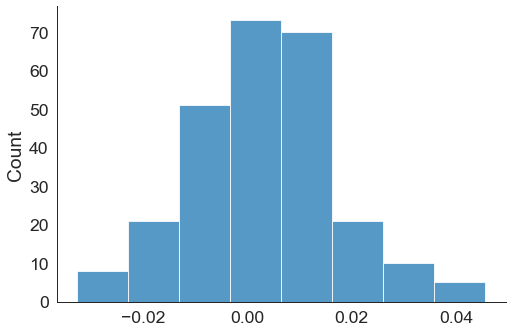

In [25]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=ret_carteira, kind="hist", bins = 8, aspect = 1.5, legend=False)
plt.show()

In [26]:
ret = ret_carteira.dropna().values
ret

array([ 8.45658097e-04,  3.01081294e-03,  8.54782934e-03, -1.29073584e-02,
        2.57279088e-02, -8.71949342e-03,  5.77201627e-03, -1.79171811e-02,
        3.22704399e-03, -1.85021768e-03, -1.07458189e-02, -1.06796664e-02,
        2.87964175e-02, -9.38083103e-03,  2.03648426e-02,  1.10429376e-02,
       -2.69534902e-02,  2.02901257e-02, -3.54115194e-03,  4.12368990e-03,
       -2.38896794e-02,  7.60348225e-03,  2.15551764e-02,  1.45112307e-02,
       -6.72466385e-03,  1.31022813e-02, -2.06124118e-02, -1.86533047e-03,
        2.22545046e-02, -1.13038382e-02,  7.86096542e-03,  3.49305015e-03,
       -2.35071019e-03, -4.03957119e-03,  7.85669978e-03,  1.04102293e-02,
       -9.58541918e-03,  1.71822053e-02, -5.84524390e-03,  8.85134390e-03,
        1.11000353e-02,  8.22568126e-03,  1.46755605e-02,  9.57405994e-03,
        5.43271097e-03,  8.57595277e-04, -1.85865673e-03,  4.95994148e-03,
        3.92764182e-03, -1.57927419e-02,  2.47746759e-02,  3.76933897e-03,
       -3.39543998e-03, -

In [27]:
dists = [ 
 'beta',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'fatiguelife',
 'gamma',
 'genextreme',
 'gengamma',
 'hypsecant',
 'invgauss',
 'johnsonsb',
 'johnsonsu',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'nakagami',
 'norm',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'reciprocal',
 'rice',
 'triang',
 'uniform',
 'weibull_max',
 'weibull_min',]

In [28]:
len(dists)

45

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1790: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


,sumsquare_error,aic,bic,kl_div
burr,5145.966651,-399.293198,796.414689,inf
logistic,5218.090379,-399.290893,788.905866,inf
johnsonsu,5274.125657,-398.903488,802.786006,inf
dweibull,5285.196781,-394.890517,797.772285,inf
exponnorm,5303.234822,-401.921774,798.654731,inf


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:4530: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


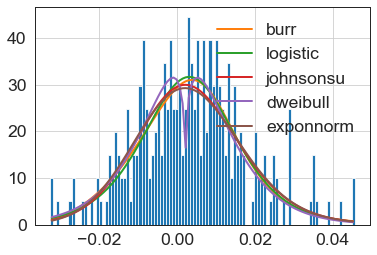

In [29]:
f = Fitter(ret,distributions=dists)
f.fit()
f.summary()

In [30]:
f.get_best()

{'burr': {'c': 8.484659702009449,
  'd': 0.4265061320305471,
  'loc': -0.043740894278960885,
  'scale': 0.0553904780076044}}